egraphs

https://dl.acm.org/doi/10.1145/1066100.1066102
https://dl.acm.org/doi/10.1145/322186.322198
https://docs.rs/egg/0.6.0/egg/
http://cseweb.ucsd.edu/~lerner/sp10-atp/
http://leodemoura.github.io/files/ematching.pdf
hash consing https://www.lri.fr/~filliatr/ftp/publis/hash-consing2.pdf

https://leanprover.github.io/papers/congr.pdf
https://users-cs.au.dk/spitters/Emil.pdf


https://docs.julialang.org/en/v1/base/collections/#Base.WeakKeyDict
Also IdDict

https://github.com/andrewcooke/AutoHashEquals.jl Relevant? Maaaaaaybe. Not directly though



Hashconsing


Hashconsing is a programming technique to convert tree data structures into a DAG datastructure. It has the advantage of lower asymptotic memory overhead when there is a great deal.
It is a close relative of memoization, a technique used to turn computations with common substructure into computations that compute .
Hmm. Maybe it is nearly exactly memoization. I often think of the fibonacci numbers as a simple example of memoization, where the difference between a simplistic recursive implementation and a memoized implelemtnation is exponential, but here instead of a simple number, we have memozied the constructors of data structures.
But what it leaves behind is also a useful data structure with interesting invariants. Because the hashconsed structure uniquifies subtrees, we can test equality without traversing the trees, instead just using a pointer check to see if they have the same canonical value or not.


There are a couple of conceptually distinct integers floating around in a hash cons
- a unique id
- a pointer
- a hash

The unique id can be the pointer or it can not be. The hash however is distinct from the other two.
Many languages make it difficult to see whether you're talking about a pointer or not. There are rules that implicitly make some things call by reference and others call by value.



Symbols in julia are interned, meaning that :a refers to a unique thing and you can use === equality to compare symbols. :a === :a is true
https://stackoverflow.com/questions/23480722/what-is-a-symbol-in-julia



People mention that one advtange of hash cons structures is that they enable fast equality checking.
But they enable some other fast operations as well
They enable a shared map operation,
In the BDD, they enable a fast apply operation. The contained values in a BDD is a bunch of Bool. But it could be Int64 for example. There are other analgous decision diagrams.

struct DD{T}
   true::DD{T}
   false::DD{T}
end
struct DDLeaf{T}
    val::T
end

Union{DD,DDLeaf}

The BDD is conceptually a function `[Bool] -> a`. This function could be tabulated or turned into a dictionary.



That computers use memory addresses under the hood to organize and retrieve data is 

It is unclear if pointers should be considered a natural aspect of achieving computation in the physical world, or some unhappy accident of what ius easy to burn into a piece of silicon and what is not.
For that reason, different languages expose pointers to different degrees.
One can always make a model of the pointer indirection using dictionaries if that is what your language offers. In some respects this is a clearn mathematical abstraction. It can be more readily be implemented side effect free. It has advantages that dcionaionaries are simpler to copy than hunks of memory with pointers in them. 



Union find data structures
The union find data structure is a fast structure for representing partitions
When you have a bunch of equations like a = b, c = d, a = c, this seperates these variables into equivalence classes.


https://juliacollections.github.io/DataStructures.jl/latest/disjoint_sets/
https://gist.github.com/lan496/deb313ff75c1bd8ca289dbe1d35f0517



I have had a slight sense that union find and shared dag structures are dual in some sense. It feels like one goes up and the other goes down

https://courses.cs.washington.edu/courses/cse507/14au/slides/L6.pdf
Initial view: Use all subterms as disjoint set. union anything we have equality for.
step 2. propagate




What kind of data is there? 
There are simple primitives like integers, characters, booleans. After that may come records of sturcts. Then vector typpes like lists and arrays.
But then the next thing you might talk about is tree.

Trees are ubiquitous in computer science and programming. They are a good structure for representing languages.
Algebraic data types represent trees. It is somewhat difficult to express a data type that isn't a tree in Haskell.

The next natural things to talk abouta after trees is DAGs, then graphs.

DAGs are a close relative of trees, but they have the extra expressive power o naturally describing shared substructure.



##

Suffix arrays.
What about storing

flatterms

struct FlatTerm
    skip::
    flat::Array{Symbol}
    parent::
end



What about specializing an egraph to strings.
What do you get then?
A variant of a trie?


In [ ]:
#unification via ref cells

Cell


In [12]:
struct Term 
    head::Symbol
    args::Array{Term}
end

function preorder!(a::Array{Symbol}, t::Term)
    push!(a,t.head)
    for t1 in t.args
        preorder!(a,t1)
    end
end

function preorder(t::Term)
    a = Symbol[]
    preorder!(a, t)
    return a
end

term(x::Symbol) = Term(x,[])
term(x::Expr) = Term(x.args[1] , term.(x.args[2:end]))
macro term(x)
    term(x)
end
t = @term f(x,g(a,y))
preorder(t)

#=
So if I made a macro that intepretted optionally tagged patterns...

f::Hom(~A,~B) == f⋅id(~A)

=#
dump(:(f::Hom(A,B)))

fresh() = PatVar(gensym())
#adding a don't care to the language of patterns would be nice.
# could avoid an unnecessary binding

function pat(e::Symbol, typ)
    if typ == nothing
        PatTerm(:call, [ PatTerm(e,[])  , fresh()  ])
    else
        PatTerm(:call, [ PatTerm(e,[])  , PatTerm(typ)  ])
    end
end

# yea. I should rework pattern matching on heads.

function pat( e::Expr, typ )
    if e.head == :call
        if e.args[1] == :~
            PatVar(e.args[2])
        else
            if typ == nothing
                PatTerm(:call, vcat( [ pat(a) for a in e.args ] ,  fresh()  ))
            else 
                PatTerm(:call, vcat( [ pat(a) for a in e.args ] ,  typ  ))
            end
        end
    elseif e.head == :(::)
        pat(e.args[1], pat(e.args[2], nothing))
        
    end
end

pattern( ::Expr) = 


Expr
  head: Symbol ::
  args: Array{Any}((2,))
    1: Symbol f
    2: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol Hom
        2: Symbol A
        3: Symbol B


In [ ]:
# a different style where we lift the head up to the data type.
# This is the analog of egg custom language rather than using generic terms
# it also gets closer to catlab's language
struct F
    a::Id
    b::Id
end

struct G
    a::Id
    b::Id
    c::Id
end

struct Ob{A}
end

struct Hom{Head}
    typ_args
    args
end


struct Compose # we already know type is Hom
 f::?
 g::?
 typ_a::Ob
 typ_b::Ob
end


Tag(f,T)

Term(:tag, [])

Hom = (a,b) -> Term(:Hom, [a,b])

Hom = (a,b) -> term!(e, :Hom, [a,b])
Ob = term!(e, :Ob, [])
tag = (t,T) -> term!(e,:tag, [t,T])
a = tag(const(e,:a), Ob)
id = a -> term!(e, tag( term!(e,:id,[a]), Hom(a,a)))
compose(f,g) = term!(e, tag(   , Hom())) 

#each equiavlanece lcass has a type? has an equiavlance class of types?
# closure under typing. a = b ==> tpye(a) = type(b). A strange inferrance although probably true. jhn major equality?
# extra field in egraph typ::Dict(Id,Id)
# new gunction symbol typ
# typ(f) == Hom(a,b). Ok nice. This is a way to internalize the typing function rather than maintainig a new dict.
# And then pattern matching requires the ability to refer to typ sometimes.
# typ()
# or we could leave types completely out of the thing and make type inference paert of the pattern match.





In [ ]:
struct TypedTerm
    head::Symbol
    type_head::Symbol
    args::Array{TypedTerm}
    type_args::Array{TypedTerm}
end

#vs

struct TypedTerm2
    head::Symbol
    typ::Nullable{TypedTerm2}
    args::Array{TypedTerm2}
end

struct TypedTerm2
    type_head::Symbol
    typ_args::Array{TypedTerm3}
    args::Array{TypedTerm2}
end

Term(:tag, )

ida = TypedTerm2(:id, TypedTerm(:Hom, TypedTerm(:KIND, nothing, []) , [a,a] ) , [a] )


KIND = TypedTerm(:KIND, :KIND2, [], [])
Ob = TypedTerm(:Ob, :KIND, [], [])
Hom = (a,b) -> TypedTerm( :Hom, :KIND, [a,b], [])

a = TypedTerm(:a , :Ob, [], [])
ida = TypedTerm( :id, :Hom , [a], [a,a] )
# The a seems unnecessary now
ida = TypedTerm( :id, :Hom , [], [a,a] )
otimes = (a,b) -> TypedTerm(:otimes, :Ob, [a,b], [])
# something makes me uncofrotable about this. We can't investiage the type of Ob?


proj1 = TypedTerm

# bth are patterns
struct PatVar
    head::Symbol
    type_head::Symbol
end

struct VarType
    head::Symbol
    args::Array{Patterns}
    type_head::Symbol
end

# neither are patterns
struct PatTerm


struct Pattern
    type_pat::Union{PatTerm, PatVar}
    pat::Union{PatTerm, PatVar}
end

struct PatTerm
    
end    
    
    

The operad style is close to a graph.
Kind of if we don't care about braiding and annoying associtivity

dynamic programminh on subgraphs?

Or greedy approach?

proof search by geometrical intuition
What if we rendered the category and handed it off to a convnet to evaluate moves

determine where symbolic stuff fgoes in latex by renaming and dffing images
Could I train a neural net to identify what parts of the image to to stuff to.
Bussy proofs.
Categorical rule output and location suggestion









In [15]:
dump(:(::))

Symbol ::


In [10]:
mutable struct Foo4
 it::Int64
end

y = Foo3(34)
x = Foo3(34)
x === y

LoadError: MethodError: no method matching Foo3(::Int64)
Closest candidates are:
  Foo3(::Int64, !Matched::Int64) at In[9]:2
  Foo3(::Any, !Matched::Any) at In[9]:2

In [ ]:
struct HashCons{T}
    node::T
    tag::Int64
    hkey::Int64
end








In [10]:
# this is a version that converts a hash into the unique entity

table = Dict()
#table = WeakKeyDict() # I'm not super sure what this does

hashcons(x::Symbol) = x
    
function hashcons(x::Expr)
  if haskey(table,x)
    table[x]
  else
    args = hashcons.(x.args)
    hashe = Expr(x.head, args...)
    table[ hashe ] = hashe
    return hashe
    end
end


hashcons (generic function with 2 methods)

In [ ]:
# This has the clear indirection of a unique identifier.
# Nodes are no longer recursive.
# This structure can be copied and serialized.

# nodes and table are inverses of each other


struct Node
    head::Symbol
    args::Array{Id}
    #id::Int64
    #hkey
    function Node(f,args...)
        
    end
end

nodes = Array{Node}[]
table = Dict{Node,Int64}()

# smart constructor.
function node(f, args...)
    n = Node(f, args)
    if haskey(table, n)
        return nodes[table[n]]
    else
        push!(nodes, n)
        table[n] = length(nodes)
        return n
    end
end

In [ ]:
struct HashConsed{T}
    id::Id
end
HC = HashConsed

BDD = HC{BDDnode}
struct BDDNode
    var::Symbol
    t::BDD
    f::BDD
end



In [ ]:
struct Node
    var::Symbol
    t::Id
    f::Id
end

nodes = Array{Node}[]
table = Dict{Node,Int64}()




In [2]:
Expr(:f,:x,:y,:z)

:($(Expr(:f, :x, :y, :z)))

In [3]:
dump(:(f(1,2)))

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol f
    2: Int64 1
    3: Int64 2


In [5]:
hashcons(:(f(a,b)))

:(f(a, b))

In [11]:
x = hashcons(:(f(a,b)))
y = hashcons(:(f(a,b)))
x === y

true

In [7]:
x = :(f(a,b))
y = :(f(a,b))
x === y

false

In [8]:
:a === :a

true

In [9]:
hash(:a)

0x6b037ee92f7ed6b0

In [18]:
# a different approach. Can't I replace the subterms with their hashes?

# Is this approach wrong and if so why
# We lose ===, traversing now requires an indirection via the table
table = Dict()
hashcons(x::Symbol) = hash(x)
    
function hashcons(x::Expr)
    args = hashcons.(x.args)
    t = Expr(x.head, args...)
    hasht = hash(t)
    table[ hasht ] = t
    return hasht
end



hashcons (generic function with 2 methods)

In [21]:
x = table[hashcons(:(f(a,b)))]
y = table[hashcons(:(f(a,b)))]
x === y # false
x == y # true
x

:((0x1b50fff03dcba4f0)(0x6b037ee92f7ed6b0, 0x8e5e38f3ddbfbcc1))

## BDD


Binary Decision Diagrams are a related data structure that could be thought of as a hash consed tree describing a shannon expansion of a boolean formula.

The tree form of a BDD would be
data BDD = Pick { var :: String, true :: BDD, false :: BDD} | True | False
or perhaps one should have a canonical ordering, in which case the variable could be descibred by a nat telling you how many vars to skip.
There is a little more here though since just hash consing this would not remove nodes whose true and false branch are identical, a useful part of the bdd construct. I suppose we could have inefficient Skipping nodes and that wouldn't hurt the BDD that much?
data BDD = Var BDD BDD | True | False


BDD Knuth

Bryant

Coursera VLSI
model checking course?



### Union Find

https://courses.cs.washington.edu/courses/cse507/19au/doc/cc.rkt

e-class is equivalence class
e-node is a term



Relation of the e graph to unification. Building up a substitution also achieves similar ends. By apply the substitution returned by unify, we canonicalize. But that is terms with variables. We don't have variables here.



Z3 - could I have done some pattern fu?


Searching for patterns in the e graph.
We could just iterate over the revmap array, even in parallel, and find all possible matches.
given a conrete candidate, macthing is not that hard.
Traverse as deep as you need to.
Type inference _is_ kind of hard. There are variables that don't appear on both sides of the equations
Perhaps we'll convert back to catlab for that.

Then in another stage, add in all these equalities.


Equality proving: add both sides of equality to egraph
occasionally check if they've joined the same equivalence class.

This I guess corresponds to putting the negated equality in a theorem prover?

Should probably put precendence on patterns that when instantiated would decrease the terms


Z3 paper talks about inverted path trees. I dunno about the code trees part.


So Nelson Oppen is about combinding conjuctions of disparate theories, not about the sat part


In [29]:
using DataStructures

a = IntDisjointSets(10)
find_root(a,20)

LoadError: BoundsError: attempt to access 10-element Array{Int64,1} at index [20]

In [ ]:
:(f(a,b))


t2 = hashcons(t)
#allSubterms(f) = Iterators.flatten(  (f, allsubterms.(f.args)  )  )
allsubterms = [    for x in table]

foo = DisjointSet(allsubterms)



In [31]:
DisjointSets(:(f(a)), :(f(a)) )

DisjointSets{Expr} with 2 elements:
  :(f(a))
  :(f(a))

In [ ]:
mutable struct EGraph
    counter::Int64
    M::Dict{Node,Int64} # maps a node to it's canonical value
    parent::Dict{Int64,Node}
    congruence::IntDisjointSets
end

mutable struct EGraph{T}
    parent::Array{Set{T}}
    congruence::DisjointSets{T} # already has dictionary in it
end

find(e::EGraph, x ) = find(e.congruence, x) # but return the index rather than the representative.
function union(e::EGraph, x, y) 
    ix = find(e, x)
    iy = find(e, y)
    union(e.congruence, x, y)
    union!(e.parent[ix] , e.parent[iy])
    e.parent[iy] = Set()
end
function merge(e, x , y)
    ix = find(e, x)
    iy = find(e, y)
    if ix === iy
        return 
    else
        for p1 in parent[ix]
            for p2 in parent[iy]
                if find(e, p1) != find(e, p2) && congruent(e, p1, p2)
                    merge(e, x, y)
                end
            end
        end
    end
end
function hashcons(e::EGraph, x::Symbol ) 
    node = Node(x, [])
    
end
function hashcons(e::EGraph, x::Expr)
    args = [ hashcons(e, a) for a in x.args[2:end] ]
    node = Node( x.head, args )
    congurence.push( )
end

   

M = Dict{Node,Int64}() # maps a node to it's canonical value
parent = Dict{Int64,Node}
congruence = IntDisjointSets()
struct Node # a node with stuff already canonical
   head::Symbol 
   args::Array{Int64}
end

counter = 0
function hashcons(e::EGraph, x::Expr)
    head = x.args[1]
    args = hashcons.(e, x.args[2:end])

    node = Node(head,args)
    if haskey(e.M, node):
        return node
    else
        e.counter += 1
        e.M[node] = e.counter
        return node
    

end
function merge(e::EGraph, f::Node,g::Node)
        

end

    

In [ ]:
#This should be similar in many respectrs to the DisjointSet implementation
# https://github.com/JuliaCollections/DataStructures.jl/blob/19eabfa5d5cb900f7ab5806b0eec6d6d5ba52035/src/disjoint_set.jl#L139
mutable struct DisjointSet{T} <: AbstractSet{T}
    intmap::Dict{T,Int}
    revmap::Vector{T}
    internal::IntDisjointSet{Int}

    DisjointSet{T}() where T = new{T}(Dict{T,Int}(), Vector{T}(), IntDisjointSet(0))
    function DisjointSet{T}(xs) where T    # xs must be iterable
        imap = Dict{T,Int}()
        rmap = Vector{T}()
        n = length(xs)
        sizehint!(imap, n)
        sizehint!(rmap, n)
        id = 0
        for x in xs
            imap[x] = (id += 1)
            push!(rmap,x)
        end
        new{T}(imap, rmap, IntDisjointSet(n))
    end
end

Congurence closure vs unification

The processes are similar but distinct.
Intuitively, they both are notions of some kind of equality. Unification is about structural equality of terms whereas congurence closure is constructing an equality relation on terms.

Congurence closure operates on terms without variables in them


Prolog variables are something akin to pointers. Unifying a prolog variable 

Voronkov paper suggestion that the martelli montanari union find unification isn't that efficient?
https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.329.1809&rep=rep1&type=pdf

https://www.cs.upc.edu/~oliveras/espai/papers/rta05.pdf proof producing congurence closure - nieuwenhuis and oliveras

The simplify paper has the most thorough explanation of smt I've seen 

https://www.sciencedirect.com/science/article/pii/S1571066108002934 E matching for fun and profit



I think a basic unification algorithm is to take every unification equation, recurse down them, and merge these terms in the e-graph.
Then at the end, check the e graph for occurs-check and inconsistency? Inconsistency is if any equivalence class has two non variable terms with different heads.
occurs check needs to traverse down everything and check that you don't find the same equivalence class in it's leaves.


If we merge two terms with disparate heads, we immediately get two terms in the egrahp




Hmmm. We are at a cross roads.
Should I push ahead and attempt pattern matching
or should I try to actually rewrite DisjointSet to do what I need.
Maintaininig parent pointers and hacing ids represent classes, not indidivual terms.


In [16]:
using DataStructures

s = DisjointSets()
push!(s, :f)
s

DisjointSets{Any} with 1 element:
  :f

In [ ]:
a = IntDisjointSets(10)  # creates a forest comprised of 10 singletons
union!(a, 3, 5)          # merges the sets that contain 3 and 5 into one and returns the root of the new set
root_union!(a, x, y)     # merges the sets that have root x and y into one and returns the root of the new set
find_root(a, 3)          # finds the root element of the subset that contains 3
in_same_set(a, x, y)     # determines whether x and y are in the same set
elem = push!(a)          # adds a single element in a new set; returns the new element
                         # (this operation is often called MakeSet)

In [17]:
a = DisjointSets{AbstractString}(["a", "b", "c", "d"])
union!(a, "a", "b")
in_same_set(a, "c", "d")
push!(a, "f")
a

DisjointSets{AbstractString} with 5 elements:
  "a"
  "b"
  "c"
  "d"
  "f"

In [18]:
push!(a,"f")

"f"

In [96]:
using Pkg
Pkg.add("DataStructures#master")

LoadError: `DataStructures#master` is not a valid package name

In [97]:
using DataStructures

We can rebuild the hashcons

We start with them having unique identifiers.
But we can compress them to mapping to eclass
But then we need to store a 
Array{Set{Term}} as the intmap. Yes... Hmmm.
Array{Array{Term}}



Egg calls this canonicalization.
Huh. So that means my smart constructors should be canonicalizing too




Main.Fumby.EGraph(DisjointSets{Main.Fumby.Term}(Dict{Main.Fumby.Term,Int64}

(), Main.Fumby.Term[], IntDisjointSets{Int64}(Int64[], Int64[], 0)))
Main.Fumby.EGraph(DisjointSets{Main.Fumby.Term}(Dict{Main.Fumby.Term,Int64}(Main.Fumby.Term(:a, Main.Fumby.Id[]) => 1), Main.Fumby.Term[Main.Fumby.Term(:a, Main.Fumby.Id[])], IntDisjointSets{Int64}([1], [0], 1)))
Main.Fumby.Term(:a, Main.Fumby.Id[])
Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(1)])
Main.Fumby

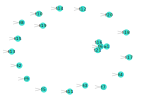

.Term(:f, Main.Fumby.Id[Main.Fumby.Id(1)])
Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(2)])
Main.Fumby

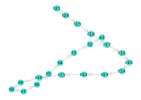

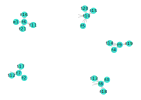

.EGraph(DisjointSets{Main.Fumby.Term}(Dict{Main.Fumby.Term,Int64}(Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(7)]) => 8,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(6)]) => 7,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(18)]) => 19,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(11)]) => 12,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(4)]) => 5,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(2)]) => 3,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(10)]) => 11,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(1)]) => 2,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(20)]) => 21,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(9)]) => 10,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(15)]) => 16,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(3)]) => 4,Main.Fumby.Term(:a, Main.Fumby.Id[]) => 1,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(14)]) => 15,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(16)]) => 17,Main.Fumby.Term(:f, Main.Fumby.Id[Main.Fumby.Id(8)]) => 9,Main.Fu

Main.FunbyTest

In [200]:
# plan. get the f^3 == f^5 working

module Fumby
using DataStructures
using AutoHashEquals
using LightGraphs
using GraphPlot
export cons!, EGraph, term!, Term, astgraph, uniongraph, astplot, unionplot, congruentify

struct Id
    it::Int64
end

@auto_hash_equals struct Term
    f::Symbol
    args::Array{Id}
end

mutable struct EGraph
    it::DisjointSets{Term}
end


function Base.push!(s::DisjointSets{T}, x::T) where T
    haskey(s.intmap, x) && return x
    id = push!(s.internal)
    s.intmap[x] = id
    push!(s.revmap, x) # Note, this assumes invariant: length(s.revmap) == id
    return x
end

function cons!(e::EGraph, x::Symbol)
      t = Term(x, [])
      push!(e.it, t)
      t #return Id(e.it.intmap[t]) #find_root!(e.it,t)
end

term!(e::EGraph, f::Symbol) = (args...) -> begin
    t = Term(f, [ Id( find_root!(e.it.internal,  e.it.intmap[a]   )) for a in args ]) # now canonicalizes
    push!(e.it,  t)
    t
end

EGraph() = EGraph(DisjointSets{Term}())


# no we really should 
Base.union!(e::EGraph, x::Term, y::Term) = union!(e.it, x, y)

"""
The idea here is that revmap is in a topological order, with stuff earlier in the array coming lower in the tree.
We compare every term with every other term. This is expensive.
As n1 increases, we should have closed the congruence for every term earlier in the array
When two terms match in head and who all arguments are equaivlaent, they too should be equaivalent. That is congruence closuer

A single sweep should hypothetically complete the entire relation.
We could improve this by keeping a parents dictionary
Or by marking which components have become "dirty"


I could inteleave pattern search with the congruentify pass.

Or maybe it is better to leave the pattern pass on it's own since it is parallelizable

"""
function congruentify(e::EGraph)
    for (n1,t1) in enumerate(e.it.revmap)
        for (n2,t2) in enumerate(e.it.revmap[1:n1])
            if t1.f == t2.f && length(t1.args) == length(t2.args) && all( [  in_same_set(e.it.internal, a1.it, a2.it) for  (a1,a2) in  zip(t1.args,t2.args) ]  )
                union!(e.it.internal, n1, n2)
            end
        end
    end
end

#function cleanhash()
#    
#end

function canonicalize()
end

"""
rebuild the egraph from scratch.

I couldn't figure out how to do that.
But this does recanonialize the hash cons
revmap does not get smaller, but intmap does possibly.
Perhaps I should mark intmap with nothing s?

This also screws up the topological ordering that congruentify relies on...?


This is trash 
"""
"""
function rebuild(e::EGraph)
    for (n,t) in enumerate(e.it.revmap)
        newargs = [ find_root!(e.it.internal, a.it) for a in t.args ]
        newt = Term(t.f, newargs)
        del(e.it.intmap, t)
        e.it.intmap[newt] = find_root!(e.it.internal, n)
        e.it.revmap[n] = newt
    end
end
"""

                #new2old = []
    #old2new = Dict()
    #= function addem(n,t)
        newargs = []
        for a in t.args
            r = find_root(a.it)
            if haskey(old2new, r)
                newargs.push!(old2new[r])
            else
                i = addem(r,revmap[r])
                old2new[n] = i 
    end
            for a in t.args
            r = find_root(a.it)
            if haskey(old2new, r)
                newargs.push!(old2new[r])
            else
                doit(revmap[r])
            
        Term(t.f, [ old2new[find_root(a.it)] for a in  t.args])
        old2new[n] = 
    
    =#
            
"""
cost extraction. A compositional best cost ast can be extracted via a dynamic programming procedure.
"""
    
function match()
end


function astgraph(e::EGraph) 
    g = SimpleDiGraph(length(e.it.revmap))
    for (n, t) in enumerate(e.it.revmap)
        for n2 in t.args
            add_edge!(g, n, n2.it)
        end
    end
    return g
end

nodelabel(e::EGraph) = ["$(t.f):$n" for (n,t) in enumerate(e.it.revmap)]

astplot(e::EGraph) =  gplot(astgraph(e), nodelabel=nodelabel(e))

function uniongraph(e::EGraph) 
    g = SimpleDiGraph(length(e.it.revmap))
    for (n,n2) in enumerate(e.it.internal.parents)
        add_edge!(g, n, n2)
    end
    return g
end
unionplot(e::EGraph) =  gplot(uniongraph(e), nodelabel=nodelabel(e))




end


module FunbyTest
using Main.Fumby
using Test

@test 2 == 2
e = EGraph()

println(e)
a = cons!(e,:a)
f = term!(e,:f)
println(e)
println(a)
println(f(a))
println(f(a))
println(f(f(a)))

#println(hash(Term(:f, [a])))
#println(hash(Term(:f, [a])))
#println(Term(:f, [a]) == Term(:f, [a]))

@test f(a) == f(a)
@test f(f(a)) == f(f(a))

#union!(e, f(f(a)), f(f(f(f(a)))))

apply(n, f, x) = n == 0 ? x : apply(n-1,f,f(x))

#union!(e, f(f(a)), a)
#union!(e, a, f(f(f(f(a)))))
union!(e, apply(5,f,a) , a)
union!(e, apply(15,f,a) , a)
union!(e, apply(10,f,a) , a)
display(unionplot(e))
congruentify(e)
println(e)

#g,= astgraph(e)

using Colors
#nodefillc = distinguishable_colors(nv(g), colorant"blue")
colors = [colorant"lightseagreen", colorant"orange"]

#display(gplot(g, nodelabel=nl ))
display(astplot(e))
display(unionplot(e))
#using GraphRecipes, Plots
#display(graphplot(g), nodelabel=String.(nl))

end






In [201]:
module Pat 
struct Var
    it::Symbol
end
struct Pattern
    head::Symbol
    args::Array{Union{Pattern,Var}}
end

function match(e::EGraph, p::Pat, t::Term, d, c)
    if p.head == t.f
        for (p1, t1 ) in zip(p.args, t.args)
            match(e,p1,t1,c)
        end
    else
        
    end
end

function match(e::EGraph, p::Var, t::Term, d)
    d[p] = t 
end


end

Main.Pat

Main.EGraphMod.Id(2)
Main.EGraphMod.Id(2)


Tuple{Main.EGraphMod.Term,Main.EGraphMod.Id}[(Main.EGraphMod.Term(:f, Main.EGraphMod.Id[Main.EGraphMod.Id(1)]), Main.EGraphMod.Id(2))]
Tuple{Main.EGraphMod.Term,Main.EGraphMod.Id}[(Main.EGraphMod.Term(:f, Main.EGraphMod.Id[Main.EGraphMod.Id(3)]), Main.EGraphMod.Id(3))]


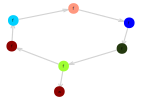

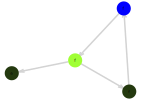

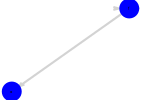

Dict{Main.EGraphMod.Term,Main.EGraphMod.Id}(Main.EGraphMod.Term(:f, Main.EGraphMod.Id[Main.EGraphMod.Id(1)]) => Main.EGraphMod.Id(3),Main.EGraphMod.Term(:f, Main.EGraphMod.Id[Main.EGraphMod.Id(3)]) => Main.EGraphMod.Id(3),Main.EGraphMod.Term(:a, Main.EGraphMod.Id[]) => Main.EGraphMod.Id(1))


Main.Egraphtest

In [189]:
module EGraphMod


using DataStructures
using LightGraphs
using GraphPlot
using Colors
struct Id
    id::Int64
end

using AutoHashEquals
@auto_hash_equals mutable struct Term
    head::Symbol
    args::Array{Id}
end

mutable struct EClass
    #id::Id # seems unnecessary?
    nodes::Array{Term}
    parents::Array{Tuple{Term,Id}}
end

mutable struct EGraph
    unionfind::IntDisjointSets
    memo::Dict{Term,Id} # int32 UInt32?
    classes::Dict{Id,EClass} # sparse vector? Doesn't seem right
    #n_classes::Int64 # do we need this? This is an optimization I think
    dirty_unions::Array{Id} # do we need this?
end


EGraph() = EGraph(IntDisjointSets(0), Dict(), Dict(), [])

# returns the canonical Id
find_root!(e::EGraph, id::Id) = Id(DataStructures.find_root!(e.unionfind, id.id))

function canonicalize!(e::EGraph, t::Term)
    t.args = [ find_root!(e, a) for a in t.args ]
end

function find_class!(e::EGraph, t::Term)  # lookup
    canonicalize!(e, t) #t.args = [ find_root!(e, a) for a in t.args ]  # canonicalize the term
    if haskey(e.memo, t)
        id = e.memo[t]
        return find_root!(e, id)
    else
        return nothing
    end
end

function Base.push!(e::EGraph, t::Term)
    id = find_class!(e,t) # also canonicalizes t
    if id == nothing # term not in egraph. Make new class and put in graph
        id = Id(push!(e.unionfind))
        cls = EClass( [t] , [] )
        for child in t.args # set parent pointers
            push!(e.classes[child].parents,  (t, id))
        end
        e.classes[id] = cls
        e.memo[t] = id
        return id
    else
        return id
    end
end


in_same_class(e::EGraph, t1::Term, t2::Term) = in_same_set(e.unionfind, e.memo[t1] , e.memo[t2])


function Base.union!(e::EGraph, id1::Id, id2::Id)
    id1 = find_root!(e, id1)
    id2 = find_root!(e, id2)
    # An invariant is that the EClass data should always keyed with the root of the union find
    # in the e.classes datastructure
    if id1 != id2 # if not already in same class
        id3 = Id(union!(e.unionfind, id1.id,id2.id)) # perform the union find
        if id3 == id1 # picked id1 as root
            to = id1
            from = id2
        elseif id3 == id2 # picked id2 as root
            to = id2
            from = id1
        else
            @assert false
        end
            
        push!(e.dirty_unions, id3) # id3 will need it's parents processed in rebuild!
        
        # we empty out the e.class[from] and put everything in e.class[to]
        for t in e.classes[from].nodes
            push!(e.classes[to].nodes, t) 
        end
        
        # recanonize all nodes in memo.
        for t in e.classes[to].nodes
            delete!(e.memo, t) # remove stale term
            canonicalize!(e, t) # update term in place in nodes array
            e.memo[t] = to # now this term is in the to eqauivalence class
        end
        
        # merge parents list
        for (p,id) in e.classes[from].parents
            push!(e.classes[to].parents, (p, find_root!(e,id)))
        end
        
        # destroy "from" from e.classes. It's information should now be
        # in e.classes[to] and it should never be accessed.
        delete!(e.classes, from) 
    end 
        
end


function repair!(e::EGraph, id::Id)
    cls = e.classes[id]
    
    #  for every parent, update the hash cons. We need to repair that the term has possibly a wrong id in it
    for (t,t_id) in cls.parents
        delete!( e.memo, t) # the parent should be updated to use the updated class id
        canonicalize!(e, t) # canonicalize
        e.memo[t] = find_root!(e, t_id) # replace in hash cons  
    end
    
    # now we need to discover possible new congruence eqaulities in the parent nodes.
    # we do this by building up a parent hash to see if any new terms are generated.
    new_parents = Dict()
    for (t,t_id) in cls.parents
        canonicalize!(e,t) # canonicalize. Unnuecessary by the above?
        if haskey(new_parents, t)
            union!(e, t_id, new_parents[t])
        end
        new_parents[t] = find_root!(e, t_id)
    end
    e.classes[id].parents = [ (p,id) for (p,id) in new_parents]
end

function rebuild!(e::EGraph)
    while length(e.dirty_unions) > 0
       todo = Set([ find_root!(e,id) for id in e.dirty_unions])
       e.dirty_unions = []
       for id in todo
            repair!(e, id)
        end
    end
end

# Base.union!(e::EGraph, t1::Term, t2::Term) = union!(e, e.memo[t1], e.memo[t2])



function consant!(e::EGraph, x::Symbol)
      t = Term(x, [])
      push!(e, t)
end

term!(e::EGraph, f::Symbol) = (args...) -> begin
    t = Term(f, collect(args))
    push!(e,  t)
end


function graph(e::EGraph) 
    nverts = length(e.memo)
    g = SimpleDiGraph(nverts)
    vertmap = Dict([ t => n for (n, (t, id)) in enumerate(e.memo)])
    #=for (id, cls) in e.classes
        for t1 in cls.nodes
            for (t2,_) in cls.parents
                add_edge!(g, vertmap[t2], vertmap[t1])
            end
        end
    end =#
    for (n,(t,id)) in enumerate(e.memo)
        for n2 in t.args
            for t2 in e.classes[n2].nodes
                add_edge!(g, n, vertmap[t2])
            end
        end
    end
    nodelabel = [ t.head for (t, id) in e.memo]
    classmap = Dict([ (id,n)  for (n,id) in enumerate(Set([ id.id for (t, id) in e.memo]))])
    nodecolor = [classmap[id.id] for (t, id) in e.memo]
    
    return g, nodelabel, nodecolor
end

function graphplot(e::EGraph) 
    g, nodelabel,nodecolor = graph(e)


    # Generate n maximally distinguishable colors in LCHab space.
    nodefillc = distinguishable_colors(maximum(nodecolor), colorant"blue")
    gplot(g, nodelabel=nodelabel, nodefillc=nodefillc[nodecolor])
end
#=
nodelabel(e::EGraph) = ["$(t.f):$n" for (n,t) in enumerate(e.it.revmap)]

astplot(e::EGraph) =  gplot(astgraph(e), nodelabel=nodelabel(e))

function uniongraph(e::EGraph) 
    g = SimpleDiGraph(length(e.it.revmap))
    for (n,n2) in enumerate(e.it.internal.parents)
        add_edge!(g, n, n2)
    end
    return g
end
unionplot(e::EGraph) =  gplot(uniongraph(e), nodelabel=nodelabel(e))
=#

end

module Egraphtest

using Main.EGraphMod: EGraph, cons!, term!, graphplot, union!, rebuild!, Id,canonicalize!, find_root!
using Test
using DataStructures
e = EGraph()
#println(e)
a = cons!(e, :a)

f = term!(e, :f)
println(f(a))
#println(e)
println(f(a))
@test e.dirty_unions == []
union!(e, f(f(a)), f(a))
@test e.dirty_unions == [Id(3)]

for ( id, cls) in e.classes
    println(cls.parents)
end
rebuild!(e)
#=for ( id, cls) in e.classes
    println(id)
    println(cls.nodes)
    println(cls.parents)
end =#
println(e.memo)
@test e.dirty_unions == []
#println(e.classes[Id(3)])
#println(e.memo)
#display(graphplot(e))

e = EGraph()
a = cons!(e, :a)
f = term!(e, :f)
apply(n, f, x) = n == 0 ? x : apply(n-1,f,f(x))


#union!(e, a, apply(3,f,a))
#rebuild!(e)
#union!(e, a, apply(2,f,a))


union!(e, a, apply(6,f,a))
display(graphplot(e))
union!(e, a, apply(9,f,a))
rebuild!(e)
display(graphplot(e))
union!(e, a, apply(11,f,a))
rebuild!(e)
display(graphplot(e))


# it appears I need parents to be an array and not a map? Does this make sense?
# It makes sense on account of this is a point I diverged from egg

# but good lord. What other problems might I have.

#union!(e, a, apply(10,f,a))
#union!(e, a, apply(15,f,a))
#rebuild!(e)
#=
println("memo : $(e.memo)")
println("classes : $(e.classes)")
println("unionfind : $(e.unionfind)")
println("dirty : $(e.dirty_unions)")
rebuild!(e)
Dict{Main.EGraphMod.Term,Main.EGraphMod.Id}(Main.EGraphMod.Term(:f, Main.EGraphMod.Id[Main.EGraphMod.Id(1)]) => Main.EGraphMod.Id(1))
println("memo : $(e.memo)")
println("classes : $(e.classes)")
println("unionfind : $(e.unionfind)")
println("dirty : $(e.dirty_unions)")
=#
#display(graphplot(e))

#=
union!(e, a, apply(9,f,a))
rebuild!(e)
display(graphplot(e))
#union!(e, a, apply(11,f,a))

rebuild!(e)
#rebuild!(e)
println("memo : $(e.memo)")
for (t,id) in e.memo
    delete!(e.memo,t)
    canonicalize!(e,t)
    e.memo[t] = find_root!(e, id)
end

=#

#=
e = EGraph()
a = cons!(e, :a)
f = term!(e, :f)
union!(e, a, f(f(f(a))))
union!(e, a, f(a))

rebuild!(e)
println(e.memo)

for i in 1:length(e.unionfind)
    println( DataStructures.find_root!(e.unionfind, i))
end
=#
#=
println(find_root!(e, Id(1)  ))
println(find_root!(e, Id(2)  ))

for (id, cls) in e.classes
    #println(cls.nodes)
    for (n, t) in enumerate(cls.nodes)
            delete!(e.memo, t) # remove stale term
            println(t)
            canonicalize!(e, t) #update term
            println(t)
            cls.nodes[n] = t
            e.memo[t] = id # now this term is in the to eqauivalence class
    end
    #println(cls.nodes)
        
end 
=#
#println(e.classes[Id(1)])
#display(graphplot(e))

#display(e.classes)
end


In [106]:
d = Dict(1 => :La, 2 => :r)
delete!(d,1)
d

Dict{Int64,Symbol} with 1 entry:
  2 => :r

In [ ]:
struct PatVar
    name::Symbol
end

struct PatTerm
    head::Symbol
    args::Array{Union{PatTerm,Var} }
end


function match( e::EGraph,  p::PatTerm, t::Term, s::Array{Dict{PatVar,Id}} )
    if length(p.args) == 0 # pattern is constant
        if in_same_set(p,t)
            S
        else
            [] #failure
        end
    else # pattern is function
        Iterators.flatten([   match( ,  , S)   for n in e.classes[t].nodes  ])
    end
end

function match( e::EGraph,  p::PatVar, t::Term, S::Array{Dict{PatVar,Id}} )
    [ begin s[p] = t; s end for s in  S if !haskey(s, p) ]
    + [ s for s in S if  in_same_set( s[x] , t ) ]
end
    


In [ ]:
module ChannelIter
struct PatVar
    name::Symbol
end

struct PatTerm
    head::Symbol
    args::Array{Union{PatTerm,Var} }
end


function match( e::EGraph,  p::Pat2, t::Term, s::Array{Term}, c )
    if length(p.args) == 0 # pattern is constant
        if in_same_set(Term(p.head,[]),t)
            send!(s, c)
        else
            return #failure
        end
    else # pattern is function
        channels = [Channel() for n in 1:length(p.args)]
        #match(e, p.args[1],  channels[1]
        send!(channels[1], s)
        push!(channels, c)
        for (parg, id, c1) in zip(p.args, t.args, channels)
            for msg in channel[n-1]
                for t1 in e.classes[t].nodes
                    match(e, parg, t1, copy(msg), channel[n])
                end
            end
        end
        for msg in channel[end]
            send!(c, msg)
        end
    end
end

match( e::EGraph,  p::PushVar, t::Term, s, c ) = send!(push!(s,t))
function match( e::EGraph,  p::CheckVar, t::Term, s, c ) 
    if find_root!(e, s[p.id]) == find_root!(e, t)
        send!(push!(s,t))
    end
end

end

In [296]:
# how to use julia generators
#https://erik-engheim.medium.com/generators-and-iterators-in-julia-and-python-6c9ace18fa93
function mygen()
    Channel() do c
        for i in 0:5
            put!(c, i)
        end
    end
end

for i in mygen()
    println(i)
end


0
1
2
3
4
5


In [9]:
using SymbolicUtils
@syms w z α::Real β::Real
r1 = @rule ~x + ~x => 2 * (~x)
@macroexpand  @rule ~x + ~x => 2 * (~x)
@code_lowered r1.matcher(d -> d, w + w, Dict())

CodeInfo(
1 ─       loop@_5 = Core.Box()
│   %2  = SymbolicUtils.islist(data)
│   %3  = !%2
└──       goto #3 if not %3
2 ─       return SymbolicUtils.nothing
3 ─ %6  = SymbolicUtils.car(data)
│   %7  = SymbolicUtils.istree(%6)
│   %8  = !%7
└──       goto #5 if not %8
4 ─       return SymbolicUtils.nothing
5 ─ %11 = SymbolicUtils.:(var"#loop#43")
│   %12 = Core.typeof(success)
│   %13 = Core.apply_type(%11, %12)
│   %14 = %new(%13, success, loop@_5)
│         Core.setfield!(loop@_5, :contents, %14)
│   %16 = Core.isdefined(loop@_5, :contents)
└──       goto #7 if not %16
6 ─       goto #8
7 ─       Core.NewvarNode(:(loop@_7))
└──       loop@_7
8 ┄ %21 = Core.getfield(loop@_5, :contents)
│   %22 = SymbolicUtils.car(data)
│   %23 = Core.getfield(#self#, :matchers)
│   %24 = (%21)(%22, bindings, %23)
└──       return %24
)

Hmm

How is the egraph different from ackermanization?
We make new constants, the Ids.



In [ ]:
# direct from the simplify paper. using CLU style iterators translated to Julai
# https://www.hpl.hp.com/techreports/2003/HPL-2003-148.pdf
function matchlist(t::Array{PatTerm} , v::Array{Term}, sub )
    Channel() do c
        if length(t) == 0
            put!(c, sub)
        else
            for sub1 in match(t[1], v[1])
                for sub2 in matchlist(t[2:end], v[2:end], sub1)
                    put!(c, sub2)
                end
            end
        end
    end
end
# sub should be a map from pattern variables to Id
function match(t::PatVar, v::Id, sub)
    Channel() do c
        if haskey(sub, t)
            if find_root!(e, sub[t]) == find_root!(e, v)
                put!(c, sub)
            else
                pass
            end
        else
            put!(c,  ImmutableDict(sub, t => find_root!(e, v))
        end
    end
end

    
function match(t::PatTerm, v::Id, sub)
    Channel() do c
        for n in e.classes[find_root!(e,v)].nodes
            if n.head == t.head
                for sub1 in matchlist( t.args , n.args , sub)
                    put!(c,sub1)
                end
            end
        end
    end
end
    
    
function matchterm( t::PatTerm, sub )
        
end
# association list. Might even be a good choice. We're probably not binding many variables
ImmutableDict


In [28]:
dump(:(x -> (x -> x)))

Expr
  head: Symbol ->
  args: Array{Any}((2,))
    1: Symbol x
    2: Expr
      head: Symbol block
      args: Array{Any}((2,))
        1: LineNumberNode
          line: Int64 1
          file: Symbol In[28]
        2: Expr
          head: Symbol ->
          args: Array{Any}((2,))
            1: Symbol x
            2: Expr
              head: Symbol block
              args: Array{Any}((2,))
                1: LineNumberNode
                2: Symbol x


In [304]:
typeof(Some(54))

Some{Int64}

In [300]:
x = [1]
x[2:1]

Int64[]

In [42]:

module PatMatch2
struct Term
    head::Symbol
    args::Array{Term}
end

struct PatVar
    id::Symbol
end

struct PatTerm
    head::Symbol
    args::Array{Union{PatTerm, PatVar}}
end

Pattern = Union{PatTerm,PatVar}


function foo(p)
    p.head == :a
end

function foo(p)
    length(p.args)
end

@Main.code_native foo(Term(:a, []))

end



	.text
; ┌ @ In[42]:25 within `foo'
; │┌ @ Base.jl:33 within `getproperty'
	movq	8(%rdi), %rax
; │└
; │┌ @ array.jl:219 within `length'
	movq	8(%rax), %rax
; │└
	retq
	nopl	(%rax)
; └


Main.PatMatch2

In [4]:
?merge

search: merge merge! mergewith mergewith! MergeSort



```
merge(d::AbstractDict, others::AbstractDict...)
```

Construct a merged collection from the given collections. If necessary, the types of the resulting collection will be promoted to accommodate the types of the merged collections. If the same key is present in another collection, the value for that key will be the value it has in the last collection listed.

# Examples

```jldoctest
julia> a = Dict("foo" => 0.0, "bar" => 42.0)
Dict{String,Float64} with 2 entries:
  "bar" => 42.0
  "foo" => 0.0

julia> b = Dict("baz" => 17, "bar" => 4711)
Dict{String,Int64} with 2 entries:
  "bar" => 4711
  "baz" => 17

julia> merge(a, b)
Dict{String,Float64} with 3 entries:
  "bar" => 4711.0
  "baz" => 17.0
  "foo" => 0.0

julia> merge(b, a)
Dict{String,Float64} with 3 entries:
  "bar" => 42.0
  "baz" => 17.0
  "foo" => 0.0
```

---

```
merge(a::NamedTuple, bs::NamedTuple...)
```

Construct a new named tuple by merging two or more existing ones, in a left-associative manner. Merging proceeds left-to-right, between pairs of named tuples, and so the order of fields present in both the leftmost and rightmost named tuples take the same position as they are found in the leftmost named tuple. However, values are taken from matching fields in the rightmost named tuple that contains that field. Fields present in only the rightmost named tuple of a pair are appended at the end. A fallback is implemented for when only a single named tuple is supplied, with signature `merge(a::NamedTuple)`.

!!! compat "Julia 1.1"
    Merging 3 or more `NamedTuple` requires at least Julia 1.1.


# Examples

```jldoctest
julia> merge((a=1, b=2, c=3), (b=4, d=5))
(a = 1, b = 4, c = 3, d = 5)
```

```jldoctest
julia> merge((a=1, b=2), (b=3, c=(d=1,)), (c=(d=2,),))
(a = 1, b = 3, c = (d = 2,))
```

---

```
merge(a::NamedTuple, iterable)
```

Interpret an iterable of key-value pairs as a named tuple, and perform a merge.

```jldoctest
julia> merge((a=1, b=2, c=3), [:b=>4, :d=>5])
(a = 1, b = 4, c = 3, d = 5)
```


In [26]:
function foo() #bad
    x = Dict(:a => 4)
    return x[:a]
end
function foo2()
    return 4
end


function foo3() # bad
    x = Dict(:a => 4)
    () -> x[:a]
end

function foo4() # much better. But we do pay a closure cost.
    x = Dict(:a => 4)
    r = x[:a]
    () -> r
end

function foo5()
    x = Dict(:a => 4)
    :( () -> $(x[:a]) )
end

function foo7()
    return foo()
end


function foo6() # julia does however do constant propagation and deletion of unnecessary bullcrap
    x = 4
    y = 7
    y += x
    return x
end

function foo7() # this compiles well
    x = Base.ImmutableDict( :a => 4)
    return x[:a]
end

function foo8()
    x = Base.ImmutableDict( :a => 4)
    r = x[:a]
    z -> z == r # still has a closure indirection. It's pretty good though
end

function foo9()
    x = Base.ImmutableDict( :a => 4)
    r = x[:a]
    z -> z == 4 
end


#@code_native foo7()

z = foo4()
#@code_llvm z()

z = eval(foo5())
@code_native z()
@code_native foo2()
@code_llvm foo6()
z = foo8()
@code_native z(3)
z = foo9()
@code_native z(3)
@code_native foo7()

# so it's possible that using an ImmutableDict is sufficient for julia to inline almost evertything itself.
# You want the indexing to happen outside the closure.


	.text
; ┌ @ In[26]:23 within `#135'
	movl	$4, %eax
	retq
	nopw	%cs:(%rax,%rax)
; └
	.text
; ┌ @ In[26]:5 within `foo2'
	movl	$4, %eax
	retq
	nopw	%cs:(%rax,%rax)
; └

;  @ In[26]:31 within `foo6'
define i64 @julia_foo6_2188() {
top:
;  @ In[26]:35 within `foo6'
  ret i64 4
}
	.text
; ┌ @ In[26]:46 within `#131'
; │┌ @ promotion.jl:398 within `=='
	cmpq	%rsi, (%rdi)
	sete	%al
; │└
	retq
	nopw	(%rax,%rax)
; └
	.text
; ┌ @ In[26]:52 within `#133'
; │┌ @ promotion.jl:398 within `=='
	cmpq	$4, %rdi
	sete	%al
; │└
	retq
	nopl	(%rax,%rax)
; └
	.text
; ┌ @ In[26]:40 within `foo7'
	movl	$4, %eax
	retq
	nopw	%cs:(%rax,%rax)
; └


Databases an foriegn keys
The #catlab perspective is that foreign keys are an essential element of a databse model

Interesintg.

What about pointers. 
performing a pull back on pointers feels like union find.

pullbacks or pushouts, are somewhat like sdolving equations. This could kind of makes sense

What about hash consing

We describeed uniification as some kind of pullback on substitutions. Goguen and burtsall book

unification and congurence closure are kind of similar. They differ in how they propagate down tree structures.




In [13]:
dump(Base.ImmutableDict(:a => 4))

Base.ImmutableDict{Symbol,Int64}
  parent: Base.ImmutableDict{Symbol,Int64}
    parent: #undef
    key: #undef
    value: Int64 0
  key: Symbol a
  value: Int64 4


The simplest pattern match is pattern matching a single pattern against a single term.



In [248]:
# pattern matching 1

module PatMatch1

struct Term
    head::Symbol
    args::Array{Term}
end

struct PatVar
    id::Symbol
end

struct PatTerm
    head::Symbol
    args::Array{Union{PatTerm,PatVar} }
end


function merge(ds)
    newd = Dict()
    for d in ds
        for (k,v) in d
            if haskey(newd,k)
                if newd[k] != v
                    return nothing
                end
            else
                newd[k] = v
            end
        end
    end
    return newd
end


match(t::Term,  p::PatVar ) = Dict(p => t)
# match returns 
function match(t::Term, p::PatTerm) 
    if t.head != p.head || length(t.args) != length(p.args)
        return nothing
    else
        merge( [ match(t1,p1) for (t1,p1) in zip(t.args, p.args)  ])
    end
end


Base.show(io::IO, t::Term) = length(t.args) > 0 ? print(io, "$(t.head)($(join(t.args, ",")))") : print(io, t.head)
Base.show(io::IO, t::PatTerm) = length(t.args) > 0 ? print(io, "$(t.head)($(join(t.args, ",")))") : print(io, t.head)
Base.show(io::IO, p::PatVar) =  print(io, "?$(p.id)")

a = Term(:a, [])
f = x -> Term(:f,[x])

pf = x -> PatTerm(:f,[x])
pa = PatTerm(:a, [])
X = PatVar(:X)
ex1 = f(f(a))
p1 = pf(X)

println(match(ex1,p1))
println(match(ex1,X))
println(p1)


"""
A second version of match receives a dictionary of already bound variables.
This has a much more imperative mutational flavor

We've lost some possible (probably not useful) parallelism, but gained some memory efficiency
"""

function match(t::Term,  p::PatVar, d ) 
    if haskey(d,p)
        if newd[k] != v
            throw(MatchFail)
        end
    else
        d[p] = t
    end
end
# match returns 
function match(t::Term, p::PatTerm, d) 
    if t.head != p.head || length(t.args) != length(p.args)
        throw(MatchFail)
    else
        for (t1,p1) in zip(t.args, p.args)
            match(t1,p1,d)
        end
    end
end

function match2(t,p)
    try
        d = Dict()
        match(  t , p , d)
        return d
    catch e
        return nothing
    end
end


println(match(ex1,p1))
println(match(ex1,X))



"""
If we know we're going to check the pattern depth first,
we can preprocess the patterm to use integer indices for variables rather than a symbol. This gains the ability to use
an Array rather than a Dict, which is better.



We took two steps here actually. 
- We can statically determine whether the pattern needs to check consistency or bind anew
- We can independently use numbers to label things.
"""
struct PushVar
end

struct CheckVar
    id::Int64
end

struct Pat2
    head::Symbol
    args::Array{Union{PushVar,CheckVar}}
end


function preprocess(p::PatVar, env, counter)
    if haskey(env,p) 
        return CheckVar(env[p]) 
    else
        env[p] = counter[]
        counter[] += 1
        return PushVar()
    end
end

function preprocess(p::PatTerm, env::Dict{PatVar, Int64}, counter)
    newargs = []
    for p1 in p.args
        push!(newargs, preprocess(p1, env, counter))
    end
    return Pat2(p.head, newargs)
end

preprocess(p::PatTerm) = preprocess(p, Dict{PatVar,Int64}(), Ref(1))
    
println(preprocess(p1))
pg = (x,y) -> PatTerm(:g,[x,y]) # We could put a little macro sugar over this. But Eh.
g = (x,y) -> Term(:g, [x,y])
println(preprocess(pg(X,X)))

struct MatchFail <: Exception end

match(t::Term,  p::CheckVar, d) = d[p.id] == t ? nothing : throw(MatchFail)
match(t::Term,  p::PushVar,  d) = push!(d, t)

# match returns 
function match(t::Term, p::Pat2, d) 
    if t.head != p.head || length(t.args) != length(p.args)
        throw(MatchFail)
    else
        
        for (t1,p1) in zip(t.args, p.args)
            match(t1,p1,d)
        end
    end
end

function match(t,p::Pat2)
    d = []
    try

        match(  t , p , d)
        return d
    catch e
        println(e)
        println("Matchfail")
        return nothing
    end
end

println(match(g(a,a), preprocess(pg(X,X))))

"""
But we don't want to necessarily check in this fixed manner. We want patterns to fail early.
Do we though? This really only becomes more important with multipatterns. Depth first is fine for memory locality probably.
You don't want to be jumping all over the place.


pattern matching combinators.

Is there a reason to not use them? Yes. So that we can perform more efficient matching.

"""

"""
The pattern is known statically, so it makes sense to partially evaluate.
We can do this by currying the pattern first.

"""



"""
CPS conversion and defunctionalization
"""


"""

Matching a term against multiple patterns

"""


"""
Matching multiple terms against one pattern
Indexing structures for the terms
"""


end



Dict{Any,Any}(?X => f(a))
Dict{Main.PatMatch1.PatVar,Main.PatMatch1.Term}

(?X => f(f(a)))
f(?X)
Dict{Any,Any}(?X => f(a))
Dict{Main.PatMatch1.PatVar,Main.PatMatch1.Term}(?X => f(f(a)))
Main.PatMatch1.Pat2(:f, Union{Main.PatMatch1.PushVar, Main.PatMatch1.CheckVar}[Main.PatMatch1.PushVar()])
Main.PatMatch1.Pat2(:g, Union{Main.PatMatch1.PushVar, Main.PatMatch1.CheckVar}[Main.PatMatch1.PushVar(), Main.PatMatch1.CheckVar(1)])
a
Main.PatMatch1.PushVar()
a
Main.PatMatch1.CheckVar(1)
Any[a]


Main.PatMatch1

In [ ]:
module Fig3

struct Init
    f::Symbol
    next::Int64
end

struct Bind
    i::Int64
    f::Symbol
    o::Int64
    next::Int64
end

struct Check
    i::Int64
    t::Term
    next::Int64
end

struct Compare
    i::Int64
    j::Int64
    next::Int64
end

struct Yield
    i::Array{Int64}
end
 # backtrack = nonempty(bstack) ? pc = pop!(bstack) : break
function interp( instr, t)
    pc = 1
    reg = [t]
    bstack = []
    Channel()
    while true
        i = instr[p]
        if i isa Init
            if reg[1].head != i.f 
                break
            end
            for t in reg[1].args
                push!(reg,t)
            end
            pc = i.next

        elseif i isa Bind
            push!(bstack, )
        elseif i isa Check
            if in_same_set(e, reg[i.i], i.f)
                pc = i.next
            else
                nonempty(bstack) ? pc = pop!(bstack) : break
            end
        elseif i isa Compare
            if in_same_set(e, reg[i.i], reg[i.j])
                pc = i.next
            else
                nonempty(bstack) ? pc = pop!(bstack) : break
            end
        elseif i isa Yield
            send!(c,  )
            nonempty(bstack) ? pc = pop!(bstack) : break
    end
end


function compile( reg2 , env, counter )
    if lenght

end

In [ ]:
function bind( x , f ) 
    cout -> 
    c1 = Channel()
    @async x(c)
    for msg in c
        f(msg, cout)
    end
end

#everything has to be channel passing style
# But this is insane. Sure I don't have to do things this way.
# I want
function bind(i,f,o,next)
    id = find_root!(reg[i])
    for n in e.classes[id].nodes
        for j in 1:length(n.args)
        reg[j+o] = n.args[j]
        next(c) # The call stack should be handling bstack?
    end

end

# We do know how many registers we need a priori.
# In addition, we 

perhaps The real isight is that we know enough about the static pattern to predict where and how much memory we'll need in reg

We could perhaps do some staging to avoid the need for reg

gensym.
The env -> gensym dictionary.

We should be inspsepcting the pattern also to make sure we're not doing anything in an idicotic ordering



In [8]:

module PartialE

struct PatVar
    id::Symbol
end

struct PatTerm
    head::Symbol
    args::Array{Union{PatTerm,PatVar} }
end

struct Term
    head::Symbol
    args
end

function prematch(p::PatVar, env, t, c )
    if haskey(env, p)
       :(  $(env[p]) != $t  && return false )
    else
       env[p] = gensym(p.id) #make fresh variable
       :(  $(env[p]) = $t  ) #bind it at runtime to the current t
    end
end


function sequence(code)
    foldl(
        (s1,s2) -> quote
                        $s1
                        $s2
                    end
        , code)
end

function prematch(p::PatTerm, env, t, c)
    if length(p.args) == 0
        :( $(t).head == $( QuoteNode(p.head)  ) && length($t) == 0 && return false   )
    else
        quote
            if $(t).head != $( QuoteNode(p.head) ) || $( length(p.args) ) != length($(t).args)
                return false
            else
                $( sequence([prematch(a, env, :( $(t).args[$n] ), c)   for (n,a) in enumerate(p.args) ]))
            end
        end 
    end
end

println( prematch( PatTerm(:f, []) , Dict(),  :w , nothing) )
println( prematch( PatTerm(:f, [PatVar(:a)]) , Dict(),  :t , nothing) )
println( prematch( PatTerm(:f, [PatVar(:a), PatVar(:a)]) , Dict(),  :t , nothing) )

# how different is this from what @match does?

end

w.head == :f && (length(w) == 0 && return false)
begin
    #= In[8]:42 =#
    if t.head != :f || 1 != length(t.args)
        #= In[8]:43 =#
        return false
    else
        #= In[8]:45 =#
        var"##a#265" = t.args[1]
    end
end
begin
    #= In[8]:42 =#
    if t.head != :f || 2 != length(t.args)
        #= In[8]:43 =#
        return false
    else
        #= In[8]:45 =#
        begin
            #= In[8]:31 =#
            var"##a#266" = t.args[1]
            #= In[8]:32 =#
            var"##a#266" != t.args[2] && return false
        end
    end
end


Main.PartialE

Hmm. This partial evluation is already getting hairy.
And I'd like to know how bad just a regular way of doing it is.

Perhaps just returning the boolean of whether a match succeeded or not is pretty good.


To match against a set of patterns, maintain a set of current patterns and current bindings

mattch(     ps :: Array{Pat}, envs::Array{Dict})

I mean.


The simplest thing is to arrange them by head
Dict{Symbol, Pattern}

function arrange_by_head(ps)
    headdict = Dict()
    for p in ps
        if haskey(headict,p.head)
            push!(hasdict[p.head], p)
        else
            hasdict(p.head) = [p]
            end
            end
end

#not not quite. I want a mappin to an arraheadict = Dict( (p.head, length(p.args) => p for p in ps)
for (h, pa) in headdict
    if check_head(h)
        sequence( match(  [p[n] for p in pa] , t) ) but it will build different and conflicting bindings for each





In [287]:
z = :x
q = :y # :(:y)
e = :($z = $( QuoteNode(q)))


LoadError: UndefVarError: pass not defined

In [5]:

struct PatVar
    id::Symbol
end

struct PatTerm
    head::Symbol
    args::Array{Union{PatTerm, PatVar}}
end

function pat(e::Symbol)
    PatTerm(e, [])
end

function pat( e::Expr )
    if e.head == :call
        if e.args[1] == :~
            PatVar(e.args[2])
        else
            PatTerm(e.args[1],  [  pat(a) for a in e.args[2:end] ] )
        end
    end
end

macro pat(e)
    pat(e)
end

@pat f(~x, ~x)


PatTerm(:f, Union{PatTerm, PatVar}[PatVar(:x), PatVar(:x)])

In [249]:
x = []
pop!(x)

LoadError: ArgumentError: array must be non-empty

In [218]:
y = Ref(1)
y[] += 1
y

Base.RefValue{Int64}(2)

Path indexing. How did that work?



Converting to abstract machine. 

1. dictiionary should be converted to array of "registers". label patvars by number not by symbol
2. 

In [191]:
using DataStructures
s = DisjointSets(:a,:b,:c,:d)
union!(s, :a, :c)
union!(s, :b, :d)
union!(s, :c, :d)
in_same_set(s,:a,:c)
# >>> true

true

In [205]:
foo(x) = x == 3 ? -1 : 4

@code_llvm foo(3)


;  @ In[205]:1 within `foo'
define i64 @julia_foo_16572(i64) {
top:
; ┌ @ promotion.jl:398 within `=='
   %1 = icmp eq i64 %0, 3
; └
  %spec.select = select i1 %1, i64 -1, i64 4
  ret i64 %spec.select
}


In [186]:
using AutoHashEquals
@auto_hash_equals struct Flux
    df::Int64
    a::Array{Int64}
end

Flux(4,[]) == Flux(4,[])

true

In [158]:
import Pkg; Pkg.add("Colors")

  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [5ae59095] + Colors v0.11.2
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [109]:
[:a, :a] == [:a, :a]

true

In [111]:
import Pkg; Pkg.add("AutoHashEquals")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [15f4f7f2] + AutoHashEquals v0.2.0
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [80]:

struct Term
    f::Symbol
    args::Array{Int64}
end
e = DisjointSets{Term}()
push!(e, Term(:a,[]))

Term(:a, Int64[])

In [19]:
a

DisjointSets{AbstractString} with 6 elements:
  "a"
  "b"
  "c"
  "d"
  "f"
  "f"

In [28]:
isbits(32)

struct Foom
    s::Symbol
    y::Int64
    z::Int64
end

struct Foob
    s::Symbol
    y::Int64
end
struct Fizbo
    s::Int64
    y::Int64
end


isbits(Foom(:f,3,4)::Union{Foob,Foom})
isbits(Fizbo(3,4))
isbits(:f)


false

In [34]:
function foo(z::Symbol)
    z == :f ? true : false
end

@code_llvm foo(:d)
@code_warntype foo(:d)
@code_native foo(:d)


;  @ In[34]:1 within `foo'
define i8 @julia_foo_1764(%jl_value_t* nonnull) {
top:
;  @ In[34]:2 within `foo'
; ┌ @ operators.jl:83 within `=='
   %1 = icmp eq %jl_value_t* %0, inttoptr (i64 140349575999920 to %jl_value_t*)
; └
  %spec.select = zext i1 %1 to i8
  ret i8 %spec.select
}
Variables
  #self#::Core.Compiler.Const(foo, false)
  z::Symbol

Body::Bool
1 ─ %1 = (z == :f)::Bool
└──      goto #3 if not %1
2 ─      return true
3 ─      return false
	.text
; ┌ @ In[34]:1 within `foo'
	movabsq	$140349575999920, %rax  # imm = 0x7FA5AE9F31B0
; │ @ In[34]:2 within `foo'
; │┌ @ operators.jl:83 within `=='
	cmpq	%rax, %rdi
	sete	%al
; │└
	retq
	nopw	%cs:(%rax,%rax)
; └


In [41]:

foo( x) = x == 3 ? nothing : ()
@code_warntype foo(5)
@code_llvm foo(5)

Variables
  #self#::Core.Compiler.Const(foo, false)
  x::Int64

Body::Union{Nothing, Tuple{}}
1 ─ %1 = (x == 3)::Bool
└──      goto #3 if not %1
2 ─      return Main.nothing
3 ─ %4 = ()::Core.Compiler.Const((), false)
└──      return %4

;  @ In[41]:2 within `foo'
define i8 @julia_foo_1837(i64) {
top:
; ┌ @ promotion.jl:398 within `=='
   %1 = icmp eq i64 %0, 3
; └
  %spec.select = select i1 %1, i8 1, i8 2
  ret i8 %spec.select
}


In [48]:
struct Red
    val::Int64
end

struct Green
    val::Int64
end

foo( x) = x == 3 ? Red(3) : Green(4)
frood(x) = foo(x) isa Red ? 3 : 4 
@code_warntype foo(5)
@code_llvm foo(5)
@code_llvm frood(5)


Variables
  #self#::Core.Compiler.Const(foo, false)
  x::Int64

Body::Union{Green, Red}
1 ─ %1 = (x == 3)::Bool
└──      goto #3 if not %1
2 ─ %3 = Main.Red(3)::Core.Compiler.Const(Red(3), false)
└──      return %3
3 ─ %5 = Main.Green(4)::Core.Compiler.Const(Green(4), false)
└──      return %5

;  @ In[48]:9 within `foo'
define { %jl_value_t*, i8 } @julia_foo_1845([8 x i8]* noalias nocapture align 8 dereferenceable(8), i64) {
top:
; ┌ @ promotion.jl:398 within `=='
   %2 = icmp eq i64 %1, 3
; └
  %spec.select = select i1 %2, { %jl_value_t*, i8 } { %jl_value_t* inttoptr (i64 140349128438944 to %jl_value_t*), i8 -126 }, { %jl_value_t*, i8 } { %jl_value_t* inttoptr (i64 140349128440432 to %jl_value_t*), i8 -127 }
  ret { %jl_value_t*, i8 } %spec.select
}

;  @ In[48]:10 within `frood'
define i64 @julia_frood_1846(i64) {
top:
; ┌ @ In[48]:9 within `foo'
; │┌ @ promotion.jl:398 within `=='
    %1 = icmp eq i64 %0, 3
; │└
   %. = select i1 %1, i64 3, i64 4
; └
  ret i64 %.
}


In [46]:
isbits(Red(3)::Union{Green,Red})

true

In [52]:
dump( @code_lowered foo(3))

Core.CodeInfo
  code: Array{Any}((6,))
    1: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: GlobalRef
          mod: Module Main
          name: Symbol ==
        2: Core.SlotNumber
          id: Int64 2
        3: Int64 3
    2: Expr
      head: Symbol gotoifnot
      args: Array{Any}((2,))
        1: Core.SSAValue
          id: Int64 1
        2: Int64 5
    3: Expr
      head: Symbol call
      args: Array{Any}((2,))
        1: GlobalRef
          mod: Module Main
          name: Symbol Red
        2: Int64 3
    4: Expr
      head: Symbol return
      args: Array{Any}((1,))
        1: Core.SSAValue
          id: Int64 3
    5: Expr
      head: Symbol call
      args: Array{Any}((2,))
        1: GlobalRef
          mod: Module Main
          name: Symbol Green
        2: Int64 4
    6: Expr
      head: Symbol return
      args: Array{Any}((1,))
        1: Core.SSAValue
          id: Int64 5
  codelocs: Array{Int32}((6,)) Int32[0, 0, 0, 0, 0, 0]
  ssavaluetypes

In [31]:
using Match

┌ Info: Precompiling Match [7eb4fadd-790c-5f42-8a69-bfa0b872bfbf]
└ @ Base loading.jl:1278


In [32]:
item = 3
@macroexpand @match item begin
   1 => "one"
   2 => "two"
   _ => "Something else..."
end

quote
    #= In[32]:3 =#
    if Match.ismatch(1, item)
        #= /home/philip/.julia/packages/Match/qiTCM/src/matchmacro.jl:408 =#
        "one"
    else
        #= /home/philip/.julia/packages/Match/qiTCM/src/matchmacro.jl:410 =#
        begin
            #= In[32]:4 =#
            if Match.ismatch(2, item)
                #= /home/philip/.julia/packages/Match/qiTCM/src/matchmacro.jl:408 =#
                "two"
            else
                #= /home/philip/.julia/packages/Match/qiTCM/src/matchmacro.jl:410 =#
                begin
                    #= In[32]:5 =#
                    "Something else..."
                end
            end
        end
    end
end

In [ ]:
using MLStyle

In [6]:
@data Shape begin # Define an algebraic data type Shape
    Rock()
    Paper()
    Scissors()
end

In [7]:
@macroexpand @match (a, b) begin
    (Paper(),    Rock())      => "Paper Wins!";
    (Rock(),     Scissors())  => "Rock Wins!";
    (Scissors(), Paper())     => "Scissors Wins!";
    (a, b)                => a == b ? "Tie!" : play(b, a)
end

:(let
      true
      var"##return#253" = nothing
      var"##255" = (a, b)
      if var"##255" isa Tuple{Scissors,Paper}
          #= In[7]:4 =#
          if begin
                      var"##256" = var"##255"[1]
                      var"##256" isa Scissors
                  end && begin
                      var"##257" = var"##255"[2]
                      var"##257" isa Paper
                  end
              var"##return#253" = let
                      "Scissors Wins!"
                  end
              $(Expr(:symbolicgoto, Symbol("####final#254#264")))
          end
      end
      if var"##255" isa Tuple{Rock,Scissors}
          #= In[7]:3 =#
          if begin
                      var"##258" = var"##255"[1]
                      var"##258" isa Rock
                  end && begin
                      var"##259" = var"##255"[2]
                      var"##259" isa Scissors
                  end
              var"##return#253" = let
                      "Rock Wins!"
     


struct TypedTerm
    type
    head
    args
end

# or just have the convention that the first argument of a term is it's type.

otimes(   ,  f , g)

f cannot be a pattern variable and still get A.
 ~f => ~f:: cdot id(~A)
 
 Unless we allow the head to be a pattern
 or we could tag everything
tag(~f, Hom(~A,~B)) == tage tag(~f,~A) cdot

We could build a typedterm egraph
